In [ ]:
# python notebook to test shape

# import the image(s)
# binary map as first start
# find the perimeter pixels/bounding polygon/contour

# compare it to a known/perfect square

# compare to normal square first
# then compare it to gradually different shapes to build up an understanding/demonstration of the metric



import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from ImageDisplay import ImageRowDisplay

# NOTE could also generate our own:
# img = np.zeros((100,100), dtype=np.uint8)
# cv.rectangle(img, (40,40), (50,50),255,-1)

# reference image
img_ref_name = '/home/dorian/CodeWSL/tab_assessment/images/square1.png'
img_comp_name = '/home/dorian/CodeWSL/tab_assessment/images/circle.png'

img_ref = cv.imread(img_ref_name,cv.IMREAD_COLOR_RGB)
img_ref = cv.cvtColor(img_ref, cv.COLOR_RGB2GRAY)

img = cv.imread(img_comp_name,cv.IMREAD_COLOR_RGB)
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.imshow(img_ref)
ax1.set_title('original binary image - reference')

ax2.imshow(img)
ax2.set_title('original binary image - target')
plt.tight_layout()


# find contours
contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# draw contours
img_contour = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
cv.drawContours(img_contour, contours, -1, (0, 255, 0), 1)

plt.figure()
plt.imshow(img_contour)
plt.title('image contours (green)')

print(contours)

plt.show()



In [ ]:
# contour metrics:
# moments
mom = cv.moments(img)
print(mom)

# for shape comparison:
# 1) polygon simpification - cv.approxPolyDP - try to make a 4-cornered polygon out of the shape
# 2) matchSHapes() - Hu invariants
# 3) normalised cross correlation 



In [ ]:
# polygon simplification approach
# https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c

# ApprThe code snippet you provided is using OpenCV's `cv::approxPolyDP` function to approximate a contour or polygon with a simpler polygon that has fewer vertices while maintaining a specified level of precision. Here's a breakdown of the key points:
# oximates a polygonal curve(s) with the specified precision.

# The function cv::approxPolyDP approximates a curve or a polygon with another curve/polygon with less vertices so that the distance between them is less or equal to the specified precision. It uses the Douglas-Peucker algorithm http://en.wikipedia.org/wiki/Ramer-Douglas-Peucker_algorithm

# Parameters
# curve	Input vector of a 2D point stored in std::vector or Mat
# approxCurve	Result of the approximation. The type should match the type of the input curve.
# epsilon	Parameter specifying the approximation accuracy. This is the maximum distance between the original curve and its approximation.
# closed	If true, the approximated curve is closed (its first and last vertices are connected). Otherwise, it is not closed.

# find contours
contours, _ = cv.findContours(img_ref, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

for contour in contours:
    # approximate the contour:
    eps = 0.02 * cv.arcLength(contour, True) # a small percentage of accuracy to approx the contour
    approx = cv.approxPolyDP(contour, eps, True)
    
    print(approx)
    
    # draw the approximation
    img_approx_contour = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
    cv.drawContours(img_approx_contour, contour, -1, (0, 255, 0), 2)
    
    plt.imshow(img_approx_contour)
    plt.title('contour approximation')
    
    
plt.show()

# NOTE gist of the approach
# find the contour
# approximate it as a square
# compare square-like stats:
# perimeter, average aspect ratio, center point, area

# UPDATE: this approach as coded won't work well because the polydp intensionally approximates the contour with 4 points, thus doesn't work well (as expected)


In [ ]:
# shape matching via contours

# find contours
cont_ref, _ = cv.findContours(img_ref, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cont, _ = cv.findContours(img_ref, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

if cont and cont_ref:
    # compare using matchshapes (Hu Moments)
    shape_similarity = cv.matchShapes(cont[0], cont_ref[0], cv.CONTOURS_MATCH_I1, 0.0)
    print(f'shape similarity = {shape_similarity}')

# similarity = 0 is perfect similarity
# set a threshold for similarity

# TODO would be good to showcase this with an array of images
# with the similarity underneath
# contours for each

In [ ]:
# shape matching via normalised cross correlation

# not exactly the typical use-case, where the function is designed to "locate" the template in a larger image, but the cross correlation value is an indicator of similarity

# pros - doesn't have to be a binary image
# must be an ideal case of a template!
# variability in appearance captured by threshold

# reference image
img_temp_name = '/mnt/c/Users/doria/Code/tab_assessment/images/square1.png'
img_comp_name = '/mnt/c/Users/doria/Code/tab_assessment/images/square3.png'

img_temp = cv.imread(img_temp_name,cv.IMREAD_COLOR_RGB)
img_temp = cv.cvtColor(img_temp, cv.COLOR_RGB2GRAY)

img = cv.imread(img_comp_name,cv.IMREAD_COLOR_RGB)
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.imshow(img_temp)
ax1.set_title('original image - template')

ax2.imshow(img)
ax2.set_title('original image - target')
plt.tight_layout()

# perform match
result = cv.matchTemplate(img, img_temp, cv.TM_CCOEFF_NORMED)

# Get the maximum correlation value (best match)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

print(f'max val of match: {max_val}')


# same TODO - display array and print results below, maybe make a class, considering how often this will be used!

0: /home/dorian/CodeWSL/tab_assessment/images/AA_reference.png
1: /home/dorian/CodeWSL/tab_assessment/images/circle.png
2: /home/dorian/CodeWSL/tab_assessment/images/square2.png
3: /home/dorian/CodeWSL/tab_assessment/images/square3.png
4: /home/dorian/CodeWSL/tab_assessment/images/square_bad.png
5: /home/dorian/CodeWSL/tab_assessment/images/square_broken.png
6: /home/dorian/CodeWSL/tab_assessment/images/square_misplaced.png
7: /home/dorian/CodeWSL/tab_assessment/images/triangle.png


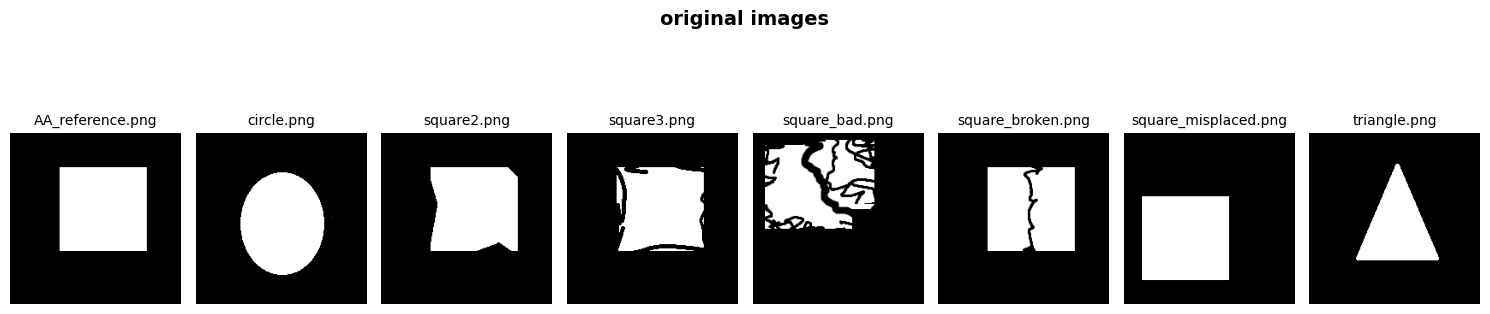

shape similarity = reference: 0.00
shape similarity = 0.13
shape similarity = 0.03
shape similarity = 0.06
shape similarity = 0.55
shape similarity = 0.48
shape similarity = 0.00
shape similarity = 0.32
shape similarity = ['reference: 0.00', '0.13', '0.03', '0.06', '0.55', '0.48', '0.00', '0.32']
['reference: 0.00', '0.13', '0.03', '0.06', '0.55', '0.48', '0.00', '0.32']


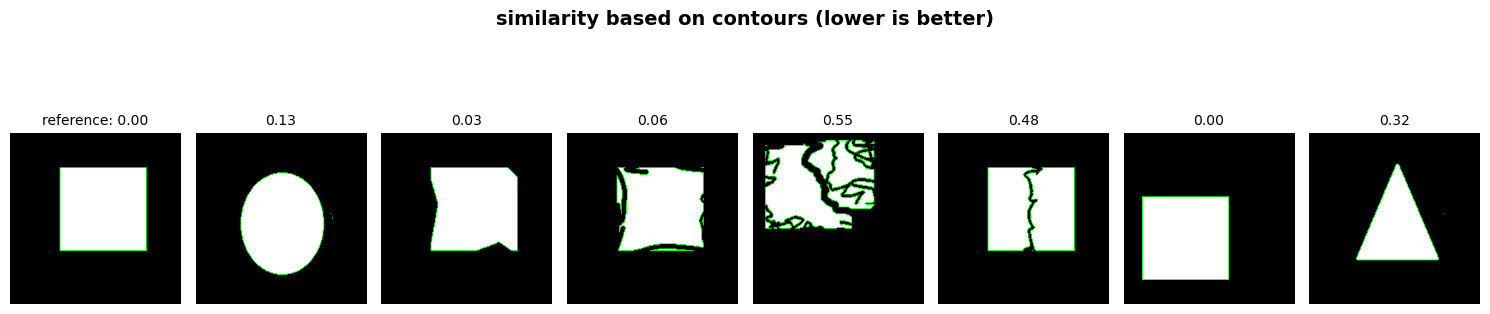

AttributeError: 'ImageRowDisplay' object has no attribute 'save'

In [ ]:
#!/usr/bin/env python3

# display all images

from ImageDisplay import ImageRowDisplay
from pathlib import Path
import cv2 as cv
import os
import matplotlib.pyplot as plt

# import numpy as np

img_dir = '/home/dorian/CodeWSL/tab_assessment/images'
out_dir = '/home/dorian/CodeWSL/tab_assessment/output'
img_list = sorted(Path(img_dir).rglob('*.png'))

figsize = (15,4)
green = (0, 255, 0)
thickness = 1

imgs = []
img_basename = []
MAX_IMG = 100
for i, img_name in enumerate(img_list):
    print(f'{i}: {img_name}')
    if i > MAX_IMG:
        print(f'MAX_IMG reached')
        break
    
    # read in the images:
    img = cv.imread(img_name,cv.IMREAD_COLOR_RGB)
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    
    img_basename.append(os.path.basename(img_name))
    imgs.append(img)

# display
fig_originals = ImageRowDisplay(images=imgs, labels=img_basename, figsize=figsize, title='original images')
fig_originals.show_images()

# now apply shape matching via contours:
img_ref_name = img_list[0] # assume the first image name in the list if the reference image (manually named AA_reference.png)
img_ref = imgs[0]
cont_ref, _ = cv.findContours(img_ref, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

shape_similarity = []
conts = []
imgs_cont = []
for i, img in enumerate(imgs):
    cont, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)   
    # only compare the maximum-sized contour: (max area? max perimeter?)
    cont_large = max(cont, key=cv.contourArea)
    
    if cont and cont_ref:
        # compute similarity measure
        similarity = cv.matchShapes(cont_large, cont_ref[0], cv.CONTOURS_MATCH_I1, 0.0)
        
        # prepare label format
        label = "{:.2f}".format(similarity)
        if i == 0:
            # reference image
            label = f'reference: {label}'
        print(f'shape similarity = {label}')
        
        # draw the contour
        img_contour = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
        cv.drawContours(img_contour, cont, -1, green, thickness) #-1 for just contour, no fill
        
        
        conts.append(cont)
        shape_similarity.append(label)
        imgs_cont.append(img_contour)

print(f'shape similarity = {shape_similarity}')
print(shape_similarity)
# make plots
fig_similarity_contour = ImageRowDisplay(images=imgs_cont, labels=shape_similarity, title="similarity based on contours (lower is better)", figsize=figsize)
fig_similarity_contour.show_images()
fig_similarity_contour.save(base_fig_name='shape_similarity.png', dir='/home/dorian/CodeWSL/tab_assessment/output')



# similarity = 0 is perfect similarity
# set a threshold for similarity

